In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [2]:
run_path = '../'
test_name = 'Schrodinger1D_Stationary'

test_path = os.path.join(run_path, test_name)

In [3]:
late_stage = 8000

In [4]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
runs

['CKAN_16',
 'CKAN_32',
 'CKAN_64',
 'CKAN_8',
 'CKAN_A_16',
 'CKAN_A_32',
 'CKAN_A_8',
 'FCN_(16, 16)',
 'FCN_(32, 32)',
 'FCN_(8, 8)',
 'FCN_32',
 'FCN_8',
 'FCN_A_32',
 'FCN_A_8',
 'FCN_[16]',
 'FCN_[32]',
 'FCN_[8]',
 'LKAN_16',
 'LKAN_32',
 'LKAN_8',
 'OptimizedStackedChebyshevKAN_deg[4, 4]_h[4]',
 'StackedCKAN_deg[4, 4, 4, 4, 4]_h[4, 4, 4, 4]',
 'StackedCKAN_deg[4, 4, 4, 4]_h[4, 4, 4]',
 'StackedCKAN_deg[4, 4, 4]_h[4, 4]',
 'StackedCKAN_deg[4, 4]_h[10]',
 'StackedCKAN_deg[4, 4]_h[2]',
 'StackedCKAN_deg[4, 4]_h[4]',
 'StackedCKAN_deg[4, 4]_h[6]',
 'StackedCKAN_deg[4, 4]_h[8]',
 'StackedChebyshevKAN__deg[4, 4]_h[12]',
 'StackedChebyshevKAN__deg[4, 4]_h[2]',
 'StackedChebyshevKAN__deg[4, 4]_h[4]',
 'StackedChebyshevKAN__deg[4, 4]_h[8]',
 'StackedChebyshevKAN__deg[6, 6]_h[4]',
 'StackedChebyshevKAN__deg[8, 8]_h[4]',
 'StackedChebyshevKAN_deg[4, 4]_h[4]',
 'StackedHermiteKAN__deg[4, 4]_h[12]',
 'StackedHermiteKAN__deg[4, 4]_h[2]',
 'StackedHermiteKAN__deg[4, 4]_h[4]',
 'StackedHermite

In [5]:
analyser = RunAnalyser(runs, test_path)

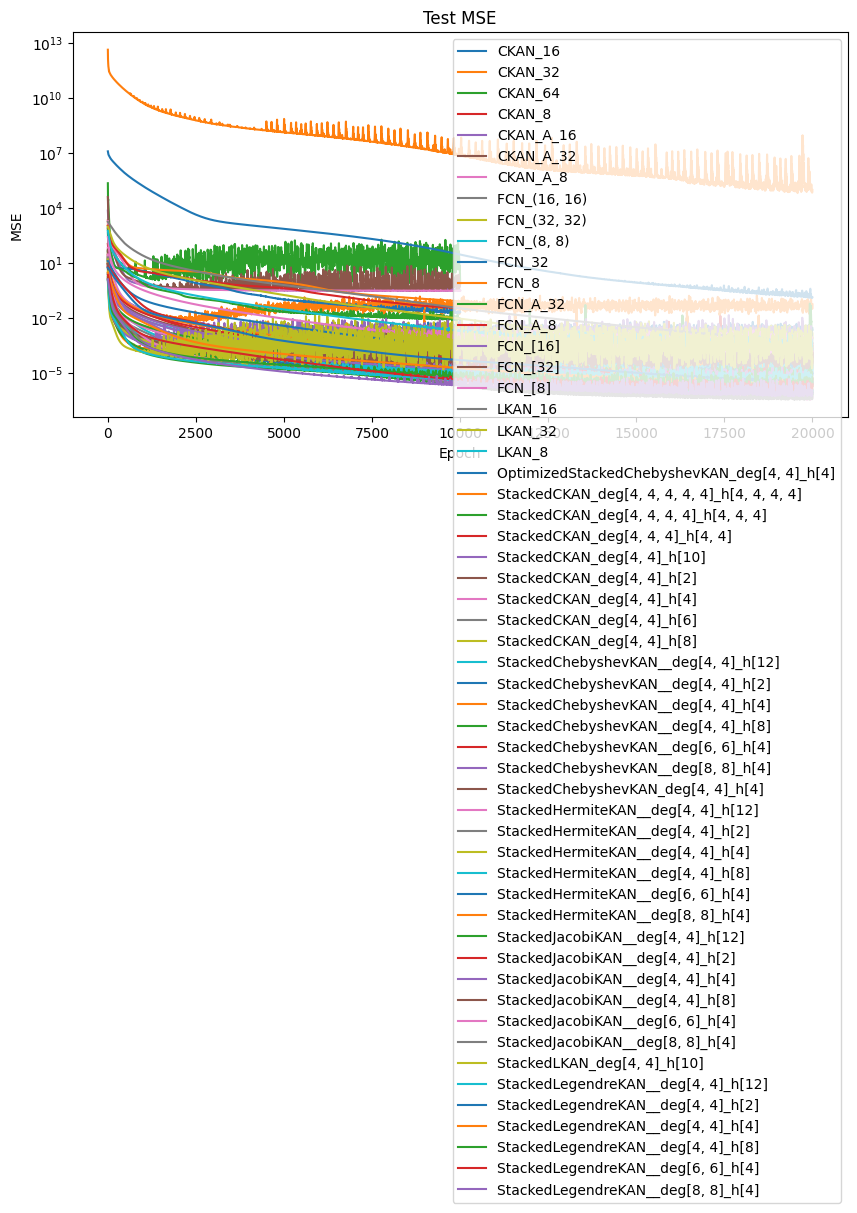

In [6]:
# Plot all models
analyser.plot_mses()

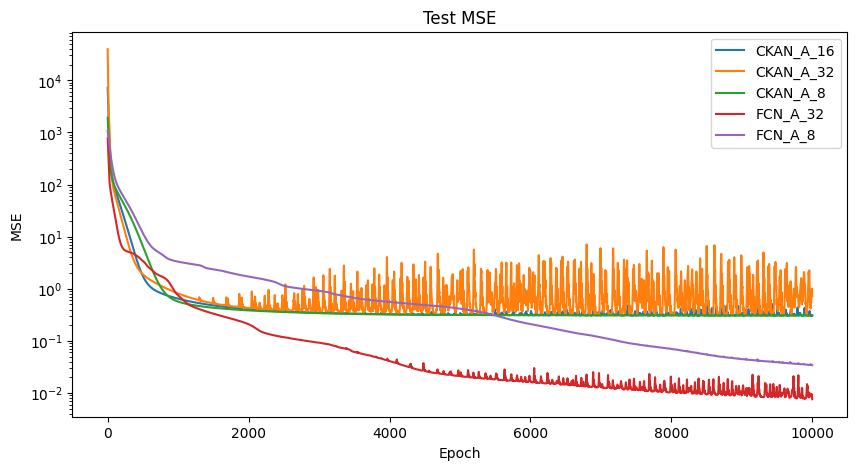

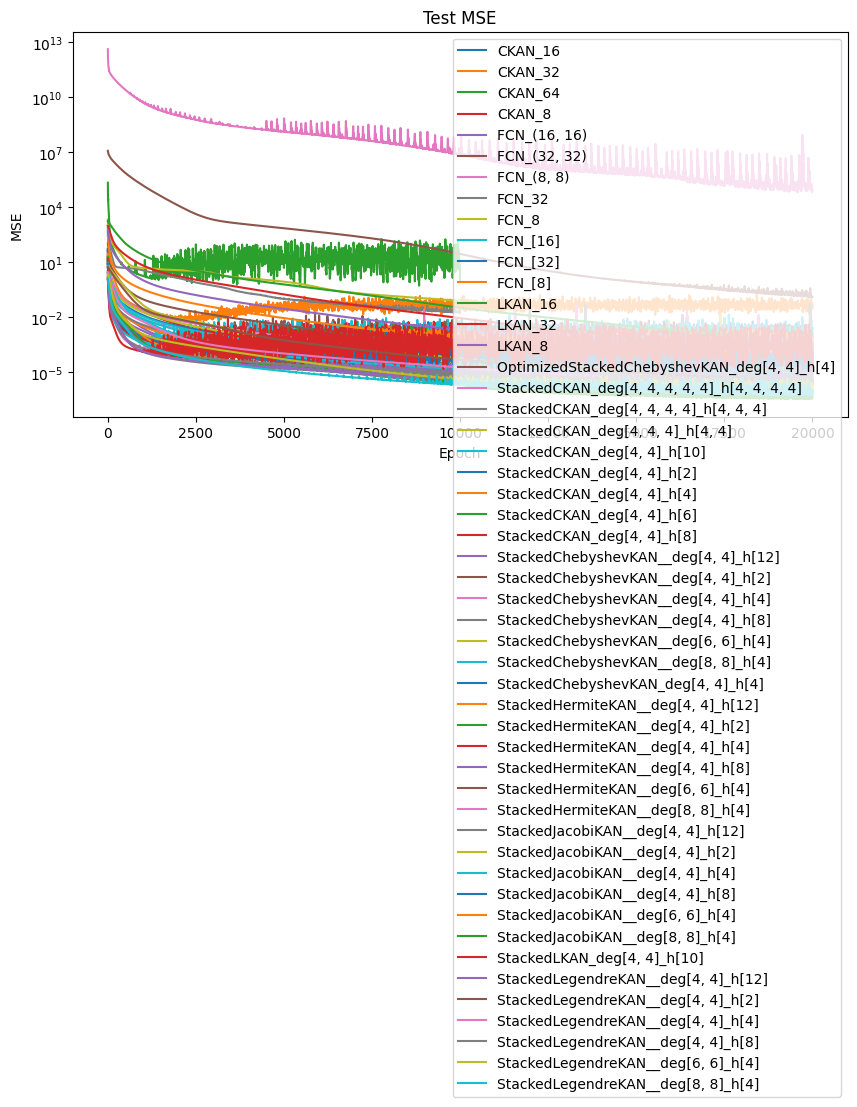

(None, None)

In [7]:
analyser.plot_mses(filter=adaptive_filter), analyser.plot_mses(filter=non_adaptive_filter)

# Non-adaptive analysis

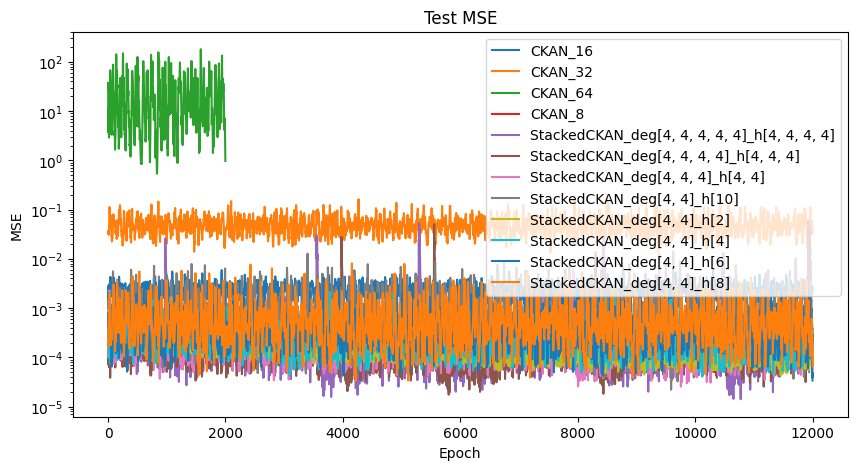

In [8]:
non_adaptive_ckans = lambda x: model_filter(x, 'CKAN') and non_adaptive_filter(x)# and '_128' not in x and '_8' not in x
analyser.plot_mses(filter=non_adaptive_ckans, start=late_stage)

CKAN_8 is best

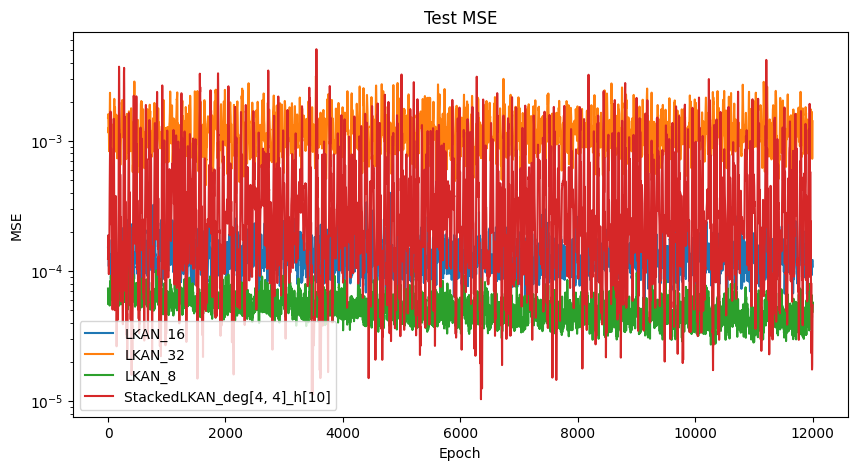

In [9]:
non_adaptive_lkans = lambda x: model_filter(x, 'LKAN') and non_adaptive_filter(x)
analyser.plot_mses(filter=non_adaptive_lkans, start=late_stage)

8 and 16 are similar

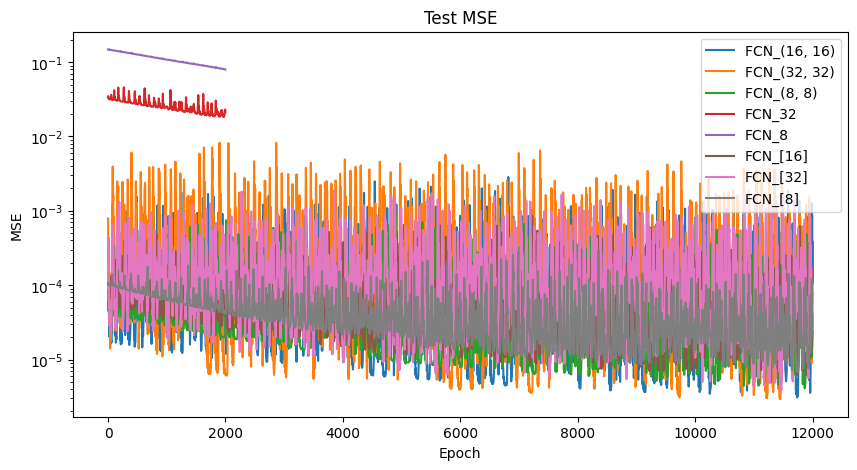

In [10]:
non_adaptive_fcns = lambda x: model_filter(x, 'FCN') and non_adaptive_filter(x) #and '_128' not in x
analyser.plot_mses(filter=non_adaptive_fcns, start=late_stage)

All are fairly unstable, 8 seems best

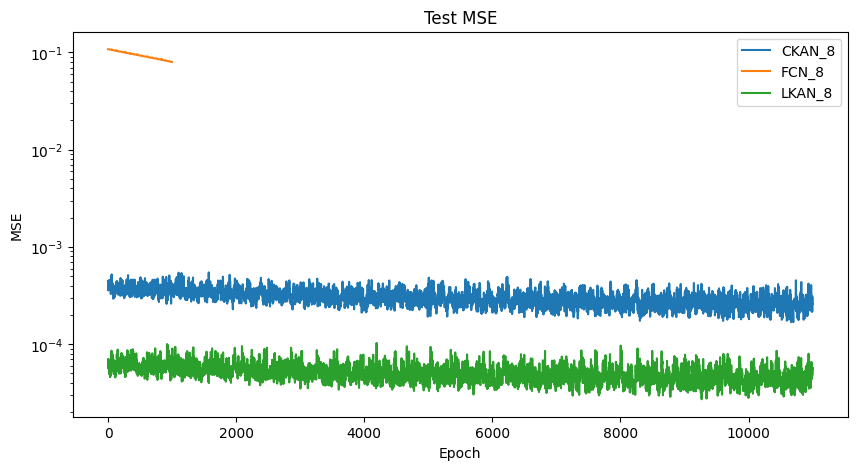

In [11]:
d = ['FCN_8', 'CKAN_8', 'LKAN_8']
f = lambda x: x in d
analyser.plot_mses(filter=f, start=9000)

fcn and lkan are the same, lkan is more stable

# Adaptive analysis

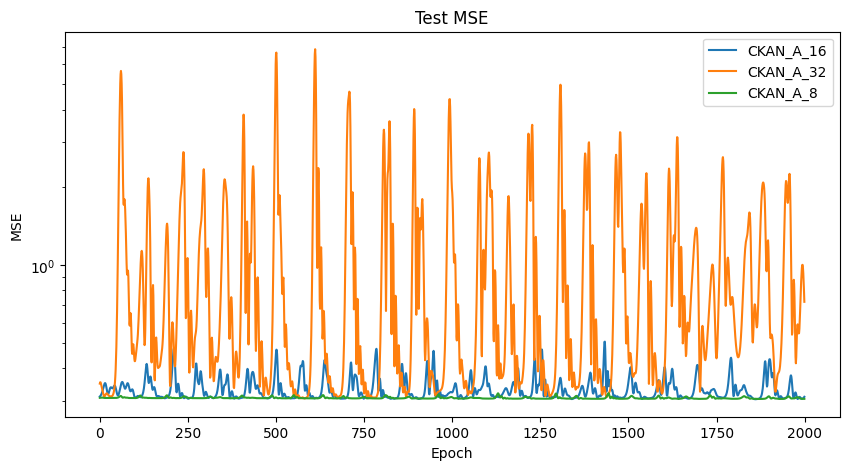

In [12]:
adaptive_ckans = lambda x: model_filter(x, 'CKAN') and adaptive_filter(x)# and '_128' not in x and '_8' not in x
analyser.plot_mses(filter=adaptive_ckans, start=late_stage)

8 is best, 16 is good

/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/exploring_utils.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


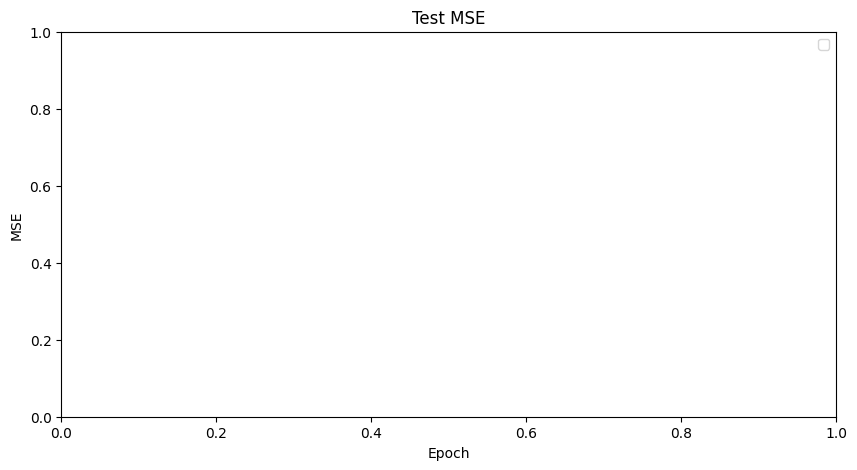

In [13]:
adaptive_lkans = lambda x: model_filter(x, 'LKAN') and adaptive_filter(x)# and '_128' not in x and '_8' not in x #  and '_8' not in x
analyser.plot_mses(filter=adaptive_lkans, start=late_stage)

8 is bes, 16 is also ok

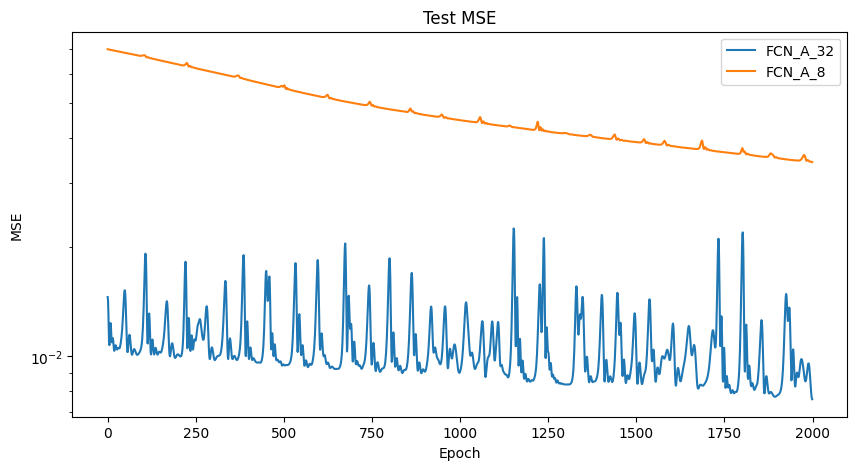

In [14]:
adaptive_fcns = lambda x: model_filter(x, 'FCN') and adaptive_filter(x) #and '_128' not in x
analyser.plot_mses(filter=adaptive_fcns, start=late_stage)

8 is best bet

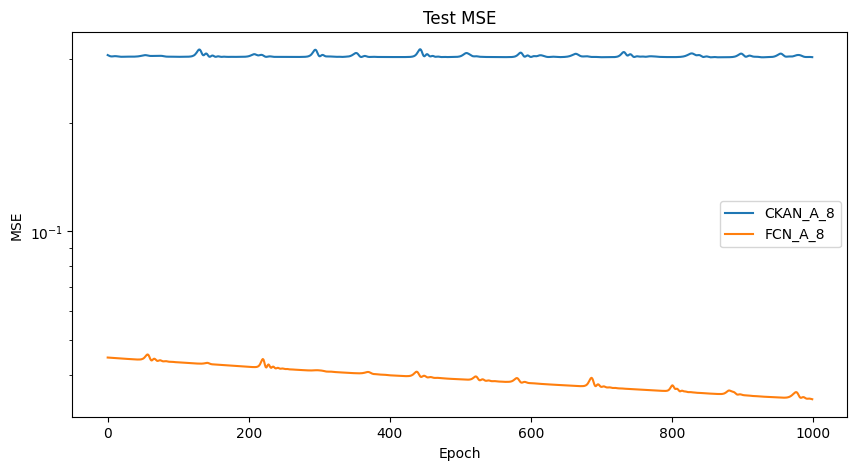

In [15]:
d = ['FCN_A_8', 'CKAN_A_8', 'LKAN_A_8']
f = lambda x: x in d
analyser.plot_mses(filter=f, start=9000)

lkan is best and most stable

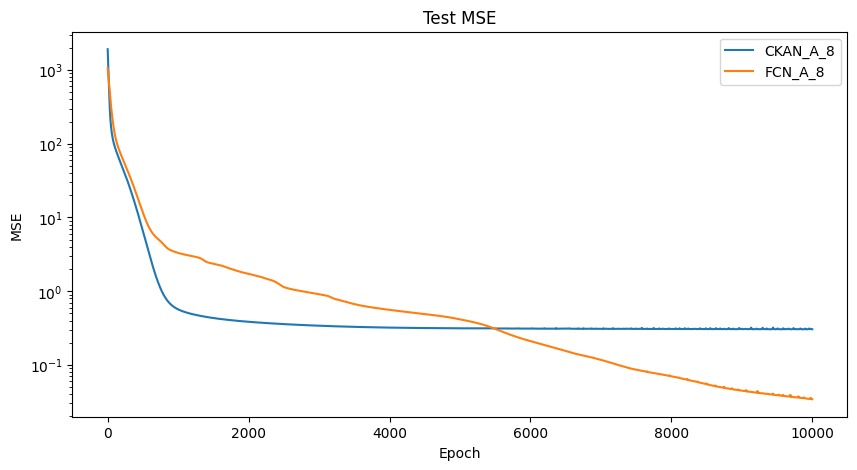

In [16]:
d = ['FCN_A_8', 'CKAN_A_8', 'LKAN_A_8']
f = lambda x: x in d
analyser.plot_mses(filter=f)

In [17]:
pred_file = f'test_10000.npy'
exact_file = 'test_exact.npy'

In [18]:
pred = np.load(os.path.join(test_path, 'LKAN_16', pred_file)).reshape(100, 100)
exact = np.load(os.path.join(test_path, 'LKAN_16', exact_file)).reshape(100, 100)
pred.shape, exact.shape

FileNotFoundError: [Errno 2] No such file or directory: '../Schrodinger1D_Stationary/LKAN_16/test_10000.npy'

In [ ]:
p, e = pred[:, 1], exact[:, 1]
# p, e = pred, exact

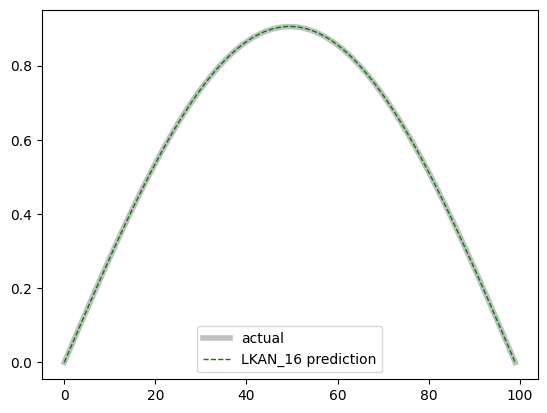

In [ ]:
plt.plot(e, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(p, label=f'LKAN_16 prediction', linestyle='--', color='green', linewidth=1)
plt.legend()

/tmp/ipykernel_517244/375021748.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(iss))
/tmp/ipykernel_517244/375021748.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.arange(0, 99)/100, np.abs((pred[:-1, i] - exact[:-1, i])/exact[:-1, i]), label=f'LKAN_16 prediction {i}', linestyle='--', color=colors(n), linewidth=2)


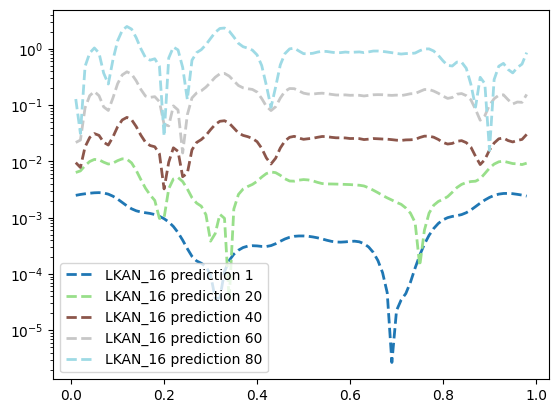

In [ ]:
iss = [1, 20, 40, 60, 80]
colors = plt.cm.get_cmap('tab20', len(iss))
for n, i in enumerate(iss):
    plt.plot(np.arange(0, 99)/100, np.abs((pred[:-1, i] - exact[:-1, i])/exact[:-1, i]), label=f'LKAN_16 prediction {i}', linestyle='--', color=colors(n), linewidth=2)
    plt.legend()
# plt.plot(np.arange(0, 100)/100, np.abs((p-e)/e))
plt.yscale('log')

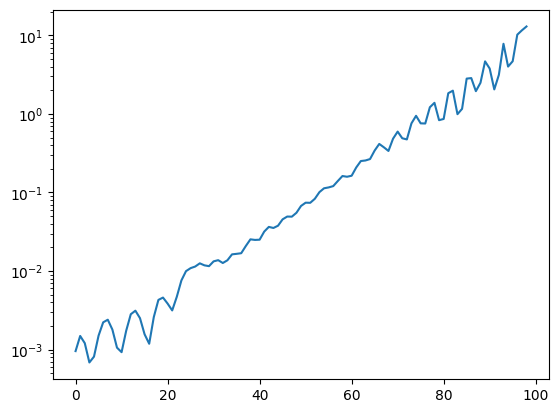

In [ ]:
plt.plot(np.mean(np.abs((pred[1:-1, 1:] - exact[1:-1, 1:])/exact[1:-1, 1:]), axis=0))
plt.yscale('log')

/tmp/ipykernel_517244/713804636.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(iss))


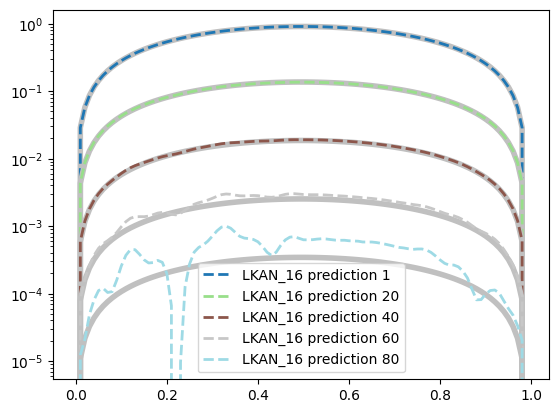

In [ ]:
iss = [1, 20, 40, 60, 80]
colors = plt.cm.get_cmap('tab20', len(iss))
for n, i in enumerate(iss):
    plt.plot(np.arange(0, 100)/100, exact[:, i], linestyle='-', lw=4, color='silver')
    plt.plot(np.arange(0, 100)/100, pred[:, i], label=f'LKAN_16 prediction {i}', linestyle='--', color=colors(n), linewidth=2)
    plt.legend()
# plt.plot(np.arange(0, 100)/100, np.abs((p-e)/e))
plt.yscale('log')

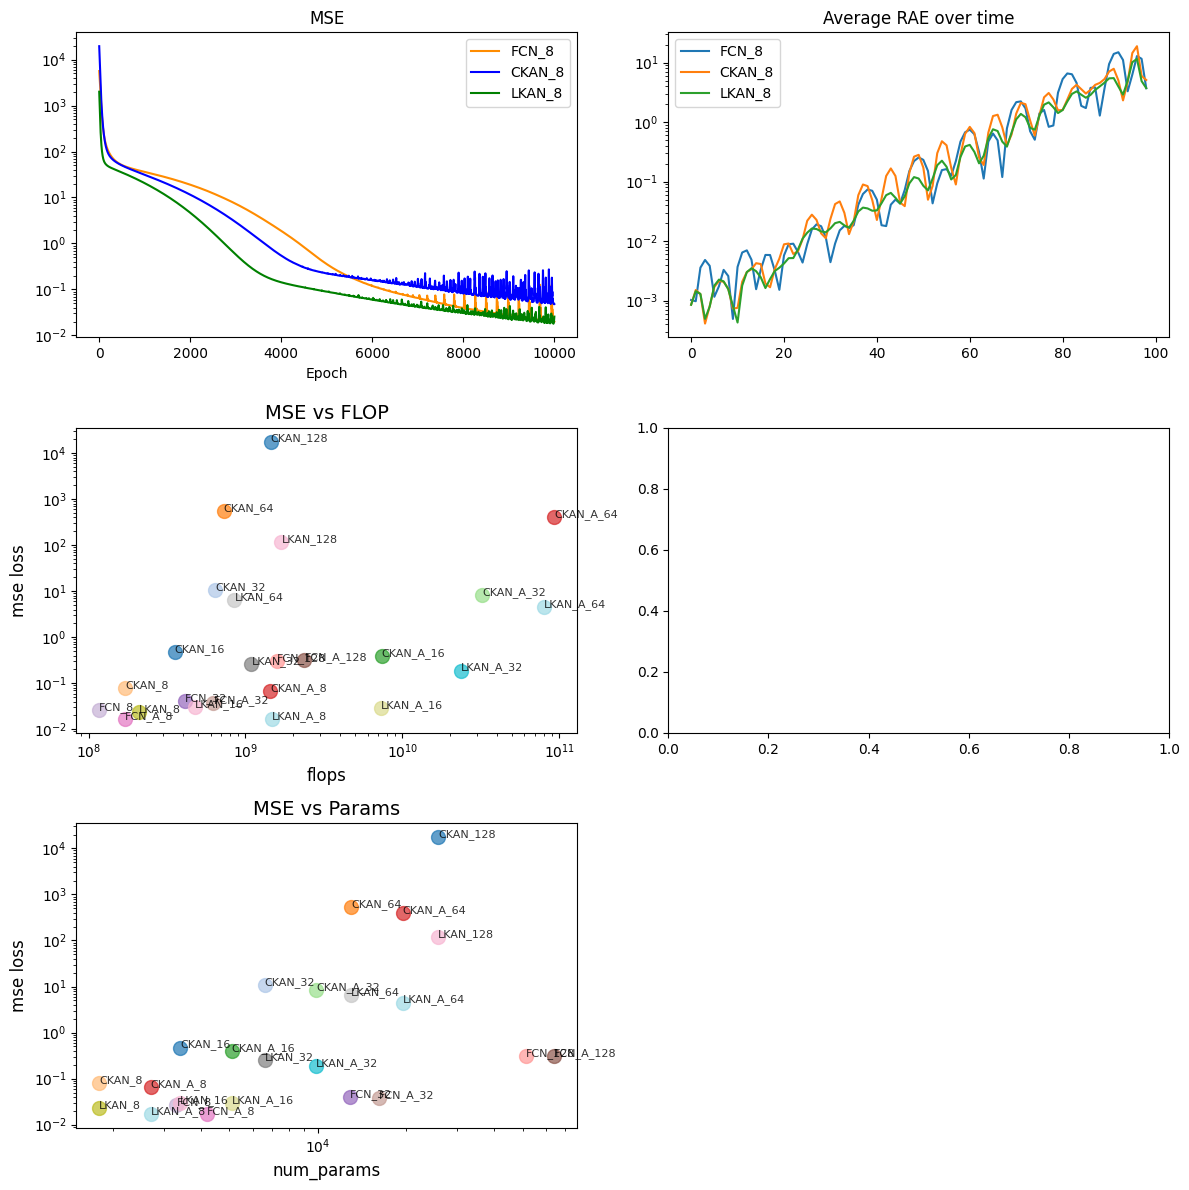

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(3,2,1)
plt.semilogy(analyser.mses['FCN_8'], label='FCN_8', color='darkorange')
plt.semilogy(analyser.mses['CKAN_8'], label='CKAN_8', color='blue')
plt.semilogy(analyser.mses['LKAN_8'], label='LKAN_8', color='green')
plt.title('MSE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(3,2,3)
analyser.plot_mse_over_flops(noshow=True, legend=False)

plt.subplot(3,2,5)
analyser.plot_mse_over_params(noshow=True, legend=False)

pred_file = f'test_10000.npy'
exact_file = 'test_exact.npy'

def plot_avg_RAE_over_time(model):
    pred = np.load(os.path.join(test_path, model, pred_file)).reshape(100, 100)
    exact = np.load(os.path.join(test_path, model, exact_file)).reshape(100, 100)
    plt.plot(
        np.mean(
            np.abs((pred[1:-1, 1:] - exact[1:-1, 1:])/exact[1:-1, 1:]), axis=0
            ))

plt.subplot(3,2,2)
plot_avg_RAE_over_time('FCN_8')
plot_avg_RAE_over_time('CKAN_8')
plot_avg_RAE_over_time('LKAN_8')
plt.legend(['FCN_8', 'CKAN_8', 'LKAN_8'])
plt.title('Average RAE over time')
plt.yscale('log')

plt.subplot(3,2,4)




plt.tight_layout()
plt.show()